In [16]:
# Simulate N tosses of M coins
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [9]:
coins = 100
tosses = 1000
data = np.random.choice([-1,1],size=(coins,tosses), replace=True)
results = np.cumsum(data,axis=1)

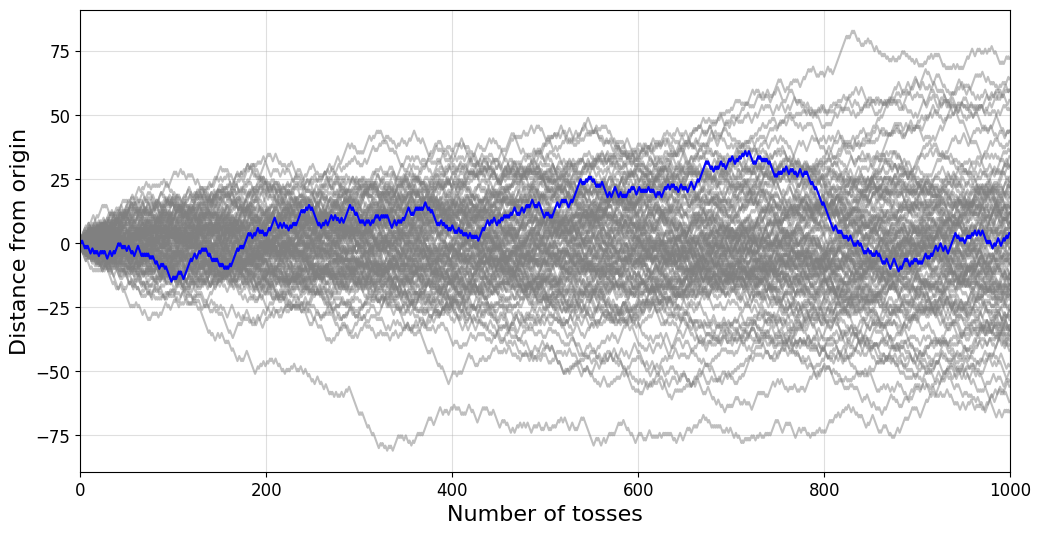

In [12]:
TICK_SZ = 12
LBL_SZ = 16

#np.random.seed(211)
idx = np.random.choice(coins)

plt.figure(figsize=(12,6))
plt.plot(results.T,color='gray', alpha=0.5)
plt.plot(results[idx,:], color='b')

plt.grid(alpha=0.4)

plt.xlabel('Number of tosses', fontsize=LBL_SZ)
plt.ylabel('Distance from origin', fontsize=LBL_SZ)

plt.xticks(fontsize=TICK_SZ)
plt.yticks(fontsize=TICK_SZ)

plt.xlim([0,tosses])
plt.savefig('../img/CoinTosses.svg', bbox_inches='tight')
plt.show()

In [47]:
fig = go.Figure(layout={'height': 600, 'width': 1200})

for i in range(results.shape[0]):
    if i == idx:
        continue
    trace = go.Scatter(y=results[i,:],
                      line={'color': 'rgba(128,128,128,0.5)'}
                      )
    fig.add_trace(trace)

trace = go.Scatter(y=results[idx, :],
                   line={'color': 'blue'}
                  )
fig.add_trace(trace)
fig.update_layout(showlegend=False,
                  xaxis={
                      'title': 'Number of tosses',
                      'title_font_size': LBL_SZ,
                      'tickfont_size': TICK_SZ
                      },
                  yaxis={
                      'title': 'Distance from origin',
                      'title_font_size': LBL_SZ,
                      'tickfont_size': TICK_SZ
                      },
                  
                 )
fig.write_html('../img/CoinTosses_plotly.html')
fig